## Projeto - Otimiza√ß√£o de Aloca√ß√£o de Recursos com Clusteriza√ß√£o



**Descri√ß√£o**: An√°lise de segmenta√ß√£o de colaboradores para aloca√ß√£o estrat√©gica em projetos


**Autor**: Ivan Ajala

In [2]:
# importa√ß√£o das bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.stats as stats
import warnings

warnings.filterwarnings('ignore')

In [3]:
# Configura√ß√µes visuais

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

#### 1. CARREGAMENTO E EXPLORA√á√ÉO DOS DADOS

In [10]:
print("=" * 60)
print("AN√ÅLISE DE SEGMENTA√á√ÉO DE COLABORADORES")
print("=" * 60)

# Carregar dados
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

print("\n1. PRIMEIRA VISUALIZA√á√ÉO DOS DADOS:")
print(f"Dimens√µes do dataset: {df.shape}")
print(f"\nColunas dispon√≠veis:")
print(df.columns.tolist())
print(f"\nPrimeiras 5 linhas:")
df.head()

AN√ÅLISE DE SEGMENTA√á√ÉO DE COLABORADORES

1. PRIMEIRA VISUALIZA√á√ÉO DOS DADOS:
Dimens√µes do dataset: (1470, 35)

Colunas dispon√≠veis:
['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Primeiras 5 linhas:


Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

#### 2. AN√ÅLISE EXPLORAT√ìRIA (EDA) - ESTAT√çSTICA DESCRITIVA

In [14]:
print("\n" + "=" * 60)
print("ESTAT√çSTICA DESCRITIVA - VARI√ÅVEIS RELEVANTES")
print("=" * 60)

# Selecionando features relevantes para clusteriza√ß√£o

features = ['JobSatisfaction', 'PerformanceRating', 'YearsAtCompany', 
           'TotalWorkingYears', 'YearsInCurrentRole', 'YearsSinceLastPromotion']

# Estat√≠stica descritiva
desc_stats = df[features].describe()
desc_stats


ESTAT√çSTICA DESCRITIVA - VARI√ÅVEIS RELEVANTES


JobSatisfaction  PerformanceRating  YearsAtCompany  TotalWorkingYears  \
count      1470.000000        1470.000000     1470.000000        1470.000000   
mean          2.728571           3.153741        7.008163          11.279592   
std           1.102846           0.360824        6.126525           7.780782   
min           1.000000           3.000000        0.000000           0.000000   
25%           2.000000           3.000000        3.000000           6.000000   
50%           3.000000           3.000000        5.000000          10.000000   
75%           4.000000           3.000000        9.000000          15.000000   
max           4.000000           4.000000       40.000000          40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  
count         1470.000000              1470.000000  
mean             4.229252                 2.187755  
std              3.623137                 3.222430  
min              0.000000                 0.000000  
25%              2.000000                 0.000000  
50%              3.000000                 1.000000  
75%              7.000000                 3.000000  
max             18.000000                15.000000

In [15]:
# An√°lise de distribui√ß√£o
print(f"\nAn√°lise de distribui√ß√£o:")
for feature in features:
    skewness = stats.skew(df[feature].dropna())
    print(f"{feature}: Assimetria = {skewness:.3f}")


An√°lise de distribui√ß√£o:
JobSatisfaction: Assimetria = -0.329
PerformanceRating: Assimetria = 1.920
YearsAtCompany: Assimetria = 1.763
TotalWorkingYears: Assimetria = 1.116
YearsInCurrentRole: Assimetria = 0.916
YearsSinceLastPromotion: Assimetria = 1.982


**Vari√°veis com Assimetria Negativa (Cauda √† Esquerda)**

**Levemente Negativa**:

- JobSatisfaction = -0.329 

    > A cauda da distribui√ß√£o √© um pouco mais longa para a esquerda. Isso sugere que a maioria das respostas de satisfa√ß√£o (a moda e a mediana) est√£o concentradas em valores mais altos (indicando maior satisfa√ß√£o), com menos pessoas reportando satisfa√ß√£o muito baixa.

**Vari√°veis com Assimetria Positiva (Cauda √† Direita)**

**Moderadamente Positiva**: 

- TotalWorkingYears = 1.116

    > Semelhante a `YearsAtCompany`, a maioria dos funcion√°rios tem poucos anos de experi√™ncia total, mas h√° uma cauda de profissionais com muita experi√™ncia.


- YearsInCurrentRole = 0.916

    > A maioria das pessoas est√° em sua fun√ß√£o atual h√° um per√≠odo relativamente curto, mas h√° funcion√°rios que est√£o na mesma fun√ß√£o h√° muito tempo.

**Fortemente Positiva**:

- YearsSinceLastPromotion = 1.982

    > √â a mais assim√©trica. A maioria das pessoas recebeu uma promo√ß√£o recentemente (anos desde a promo√ß√£o √© baixo), mas h√° uma cauda longa de funcion√°rios que esperam por uma promo√ß√£o h√° muitos anos.

- YearsAtCompany = 1.763

    > A maioria dos funcion√°rios est√° na empresa h√° poucos anos, mas existe um grupo menor de funcion√°rios de longa data (veteranos) que formam a cauda longa.

#### 3. PR√â-PROCESSAMENTO DOS DADOS

In [ ]:
print("\n" + "=" * 60)
print("PR√â-PROCESSAMENTO DOS DADOS")
print("=" * 60)

# Verificando valores missing
print("Valores missing por feature:")
print(df[features].isnull().sum())


PR√â-PROCESSAMENTO DOS DADOS
Valores missing por feature:
JobSatisfaction            0
PerformanceRating          0
YearsAtCompany             0
TotalWorkingYears          0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
dtype: int64


**Nota-se** que n√£o h√° evidencias de valores missing nestas features.

In [17]:
# Criando dataset para clusteriza√ß√£o

X = df[features].copy()

In [22]:
print(X.head())

   JobSatisfaction  PerformanceRating  YearsAtCompany  TotalWorkingYears  \
0                4                  3               6                  8   
1                2                  4              10                 10   
2                3                  3               0                  7   
3                3                  3               8                  8   
4                2                  3               2                  6   

   YearsInCurrentRole  YearsSinceLastPromotion  
0                   4                        0  
1                   7                        1  
2                   0                        0  
3                   7                        3  
4                   2                        2  


In [24]:
# Padroniza√ß√£o dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"\nDados ap√≥s padroniza√ß√£o:")
print(f"Dimens√µes: {X_scaled.shape}")
print(f"M√©dia: {np.mean(X_scaled, axis=0).round(2)}")
print(f"Desvio padr√£o: {np.std(X_scaled, axis=0).round(2)}")


Dados ap√≥s padroniza√ß√£o:
Dimens√µes: (1470, 6)
M√©dia: [-0. -0. -0. -0.  0.  0.]
Desvio padr√£o: [1. 1. 1. 1. 1. 1.]


In [27]:
print(X_scaled)

[[ 1.15325359 -0.42623002 -0.16461311 -0.42164246 -0.0632959  -0.67914568]
 [-0.66085318  2.34615106  0.48850773 -0.1645114   0.76499762 -0.36871529]
 [ 0.2462002  -0.42623002 -1.14429437 -0.55020799 -1.16768726 -0.67914568]
 ...
 [-0.66085318  2.34615106 -0.16461311 -0.67877352 -0.61549158 -0.67914568]
 [-0.66085318 -0.42623002  0.32522752  0.7354473   0.48889978 -0.67914568]
 [ 0.2462002  -0.42623002 -0.49117353 -0.67877352 -0.33939374 -0.36871529]]


#### 4. DEFINI√á√ÉO DO N√öMERO DE CLUSTERS - M√âTODO DO COTOVELO

In [29]:
# Testando diferentes n√∫meros de clusters
wcss = []  # Within-Cluster Sum of Square
silhouette_scores = []
k_range = range(2, 8)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    
    if k > 1:  silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))


DEFINI√á√ÉO DO N√öMERO √ìTIMO DE CLUSTERS


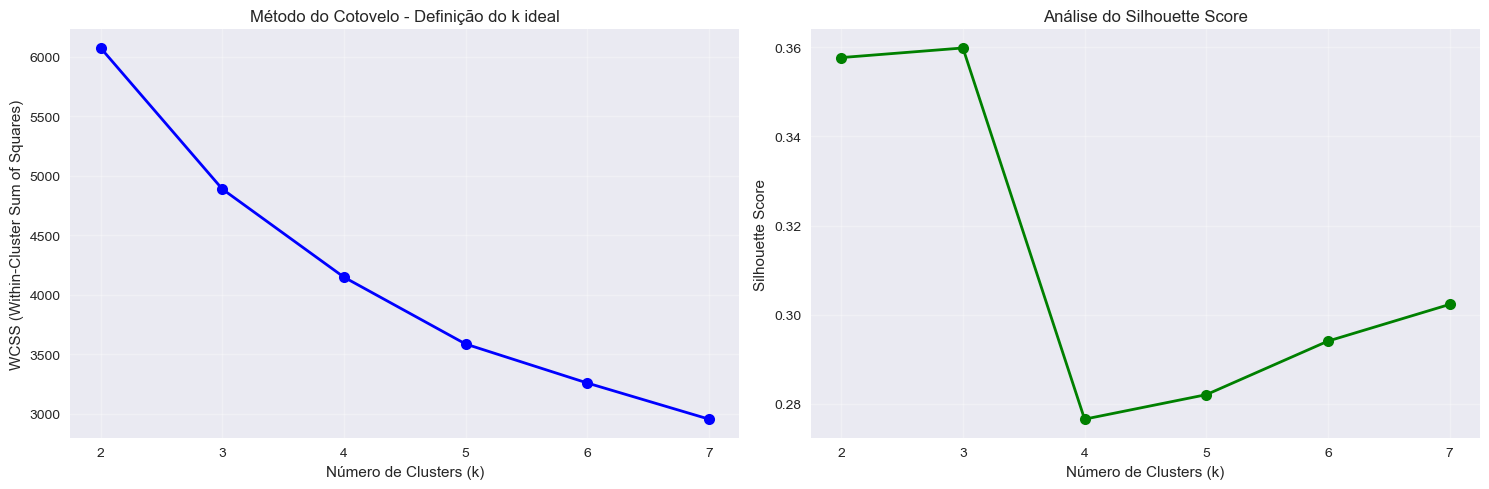

In [30]:
print("\n" + "=" * 60)
print("DEFINI√á√ÉO DO N√öMERO √ìTIMO DE CLUSTERS")
print("=" * 60)

# Plotar m√©todo do cotovelo
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, 'bo-', linewidth=2, markersize=8)
plt.xlabel('N√∫mero de Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('M√©todo do Cotovelo - Defini√ß√£o do k ideal')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(range(2, 8), silhouette_scores, 'go-', linewidth=2, markersize=8)
plt.xlabel('N√∫mero de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('An√°lise do Silhouette Score')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('elbow_method.png', dpi=300, bbox_inches='tight')
plt.show()

In [31]:
# Escolhendo k baseado no m√©todo do cotovelo (vamos usar k=3)

optimal_k = 3
print(f"\nN√∫mero √≥timo de clusters escolhido: {optimal_k}")


N√∫mero √≥timo de clusters escolhido: 3


#### 5. APLICA√á√ÉO DO K-MEANS

In [32]:
print("\n" + "=" * 60)
print("APLICA√á√ÉO DO ALGORITMO K-MEANS")
print("=" * 60)

# Aplicando K-Means com k √≥timo
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Adicionando clusters ao dataframe original
df['Cluster'] = clusters
df['Cluster'] = df['Cluster'].astype(str)

print(f"Clusteriza√ß√£o conclu√≠da. Distribui√ß√£o dos clusters:")
cluster_distribution = df['Cluster'].value_counts().sort_index()
print(cluster_distribution)


APLICA√á√ÉO DO ALGORITMO K-MEANS
Clusteriza√ß√£o conclu√≠da. Distribui√ß√£o dos clusters:
Cluster
0    341
1    931
2    198
Name: count, dtype: int64


#### 6. AN√ÅLISE DOS CLUSTERS - ESTAT√çSTICA INFERENCIAL

In [33]:
print("\n" + "=" * 60)
print("AN√ÅLISE ESTAT√çSTICA DOS CLUSTERS")
print("=" * 60)

# Analisar diferen√ßas entre clusters
cluster_analysis = df.groupby('Cluster')[features].mean()
print("M√©dias por cluster:")
print(cluster_analysis.round(2))

# Teste ANOVA para verificar diferen√ßas significativas
print("\nTESTE ANOVA - Verificando diferen√ßas significativas entre clusters:")
for feature in features:
    groups = [df[df['Cluster'] == str(i)][feature] for i in range(optimal_k)]
    f_stat, p_value = stats.f_oneway(*groups)
    print(f"{feature}: F-statistic = {f_stat:.3f}, p-value = {p_value:.4f} {'***' if p_value < 0.001 else '**' if p_value < 0.01 else '*' if p_value < 0.05 else ''}")


AN√ÅLISE ESTAT√çSTICA DOS CLUSTERS
M√©dias por cluster:
         JobSatisfaction  PerformanceRating  YearsAtCompany  \
Cluster                                                       
0                   2.69               3.08           15.11   
1                   2.74               3.00            4.37   
2                   2.74               4.00            5.47   

         TotalWorkingYears  YearsInCurrentRole  YearsSinceLastPromotion  
Cluster                                                                  
0                    18.77                8.80                     6.34  
1                     8.85                2.68                     0.83  
2                     9.81                3.65                     1.41  

TESTE ANOVA - Verificando diferen√ßas significativas entre clusters:
JobSatisfaction: F-statistic = 0.244, p-value = 0.7839 
PerformanceRating: F-statistic = 4724.878, p-value = 0.0000 ***
YearsAtCompany: F-statistic = 833.662, p-value = 0.0000 ***
TotalWo

**An√°lise das M√©dias por Cluster (Caracteriza√ß√£o dos Grupos)**

A tabela de m√©dias revela o "perfil" de cada um dos tr√™s clusters (0, 1 e 2) com base nas vari√°veis usadas para agrupamento.


| Vari√°vel | Cluster 0 (M√©dia) | Cluster 1 (M√©dia) | Cluster 2 (M√©dia) | Destaque na Caracteriza√ß√£o |
| :--- | :--- | :--- | :--- | :--- |
| **JobSatisfaction** | 2.69 | 2.74 | 2.74 | **Sem diferen√ßa clara.** Todas as m√©dias s√£o baixas e muito pr√≥ximas. |
| **PerformanceRating** | 3.08 | 3.00 | **4.00** | **Cluster 2** tem o *Rating* de performance mais alto (m√©dia de 4.00, sugerindo um grupo de alta performance). |
| **YearsAtCompany** | **15.11** | 4.37 | 5.47 | **Cluster 0** representa funcion√°rios com **muitos anos** na empresa (Veteranos). |
| **TotalWorkingYears**| **18.77** | 8.85 | 9.81 | **Cluster 0** √© o grupo de maior experi√™ncia total. |
| **YearsInCurrentRole** | **8.80** | 2.68 | 3.65 | **Cluster 0** est√° h√° muito tempo na fun√ß√£o atual. |
| **YearsSinceLastPromotion** | **6.34** | 0.83 | 1.41 | **Cluster 0** est√° h√° muito tempo sem promo√ß√£o. **Clusters 1 e 2** receberam promo√ß√£o recentemente. |

**Cluster 0: "Os Veteranos Estagnados"**

- **Caracter√≠sticas**: Alta experi√™ncia ($\approx 19$ anos de trabalho total), muito tempo na empresa ($\approx 15$ anos) e na fun√ß√£o atual ($\approx 9$ anos), mas com um longo tempo sem promo√ß√£o ($\approx 6.3$ anos).

- **Insights**: Este grupo pode representar funcion√°rios com alto conhecimento institucional, mas que podem estar enfrentando estagna√ß√£o de carreira.

**Cluster 1: "Os Novos de Performance M√©dia"**

- **Caracter√≠sticas**: Baixa experi√™ncia total ($\approx 9$ anos), pouco tempo na empresa ($\approx 4$ anos) e na fun√ß√£o ($\approx 2.7$ anos), e promo√ß√£o muito recente ($\approx 0.8$ anos). Rating de Performance M√©dio (3.00).

- **Insights**: Este √© provavelmente o grupo de novos contratados ou talentos que est√£o come√ßando a se estabelecer.

**Cluster 2: "Os Recentes de Alta Performance"****

- **Caracter√≠sticas**: Semelhante ao Cluster 1 em tempo de empresa/fun√ß√£o, mas a caracter√≠stica distintiva √© o Performance Rating muito Alto (4.00).

- **Insights**: Este grupo representa talentos que, apesar de estarem na empresa h√° relativamente pouco tempo, s√£o os top performers.

**Interpreta√ß√£o do Teste ANOVA (Valida√ß√£o dos Clusters)**

Aplicando o  **Teste ANOVA** √© pooss√≠vel verificar se as diferen√ßas nas m√©dias das vari√°veis entre os clusters (que observamos na tabela) s√£o estatisticamente significativas.

- **Hip√≥tese Nula** ($H_0$): As m√©dias de todos os clusters para a vari√°vel s√£o iguais.

- **Hip√≥tese Alternativa** ($H_a$): Pelo menos uma m√©dia de cluster √© diferente das outras.

- **Decis√£o**: Se o $p$-value for muito baixo (tipicamente abaixo de 0.05), rejeitamos $H_0$ e conclu√≠mos que h√° diferen√ßa significativa.

| Vari√°vel | $F$-statistic | $p$-value | Significado (Interpreta√ß√£o) |
| :--- | :--- | :--- | :--- |
| **JobSatisfaction** | 0.244 | 0.7839 | **N√£o Significativo.** O alto $p$-value indica que as m√©dias de satisfa√ß√£o s√£o estatisticamente **iguais**. Esta vari√°vel n√£o foi um bom fator para diferenciar os clusters. |
| **PerformanceRating** | 4724.878 | $0.0000 \text{ ***}$ | **Altamente Significativo.** O $p$-value de $0.0000$ confirma que as diferen√ßas nas notas de performance entre os clusters s√£o **reais** (e n√£o aleat√≥rias). |
| **YearsAtCompany** | 833.662 | $0.0000 \text{ ***}$ | **Altamente Significativo.** As diferen√ßas no tempo de empresa s√£o **cruciais** para a forma√ß√£o dos clusters. |
| **TotalWorkingYears** | 287.644 | $0.0000 \text{ ***}$ | **Altamente Significativo.** As diferen√ßas na experi√™ncia total s√£o **cruciais**. |
| **YearsInCurrentRole** | 702.114 | $0.0000 \text{ ***}$ | **Altamente Significativo.** O tempo na fun√ß√£o √© um fator forte de separa√ß√£o. |
| **YearsSinceLastPromotion** | 751.775 | $0.0000 \text{ ***}$ | **Altamente Significativo.** O tempo sem promo√ß√£o √© um fator forte para diferenciar os grupos. |

**Nota-se** que o algoritmo de clustering foi extremamente bem-sucedido em agrupar os funcion√°rios com base em todas as vari√°veis, exceto **JobSatisfaction**. 

As diferen√ßas observadas nas m√©dias de **TotalWorkingYears**, **PerformanceRating**, **YearsAtCompany**, **YearsInCurrentRole** e **YearsSinceLastPromotion** s√£o estatisticamente v√°lidas e definem os grupos.

#### 7. VISUALIZA√á√ÉO DOS RESULTADOS


VISUALIZA√á√ÉO DOS CLUSTERS


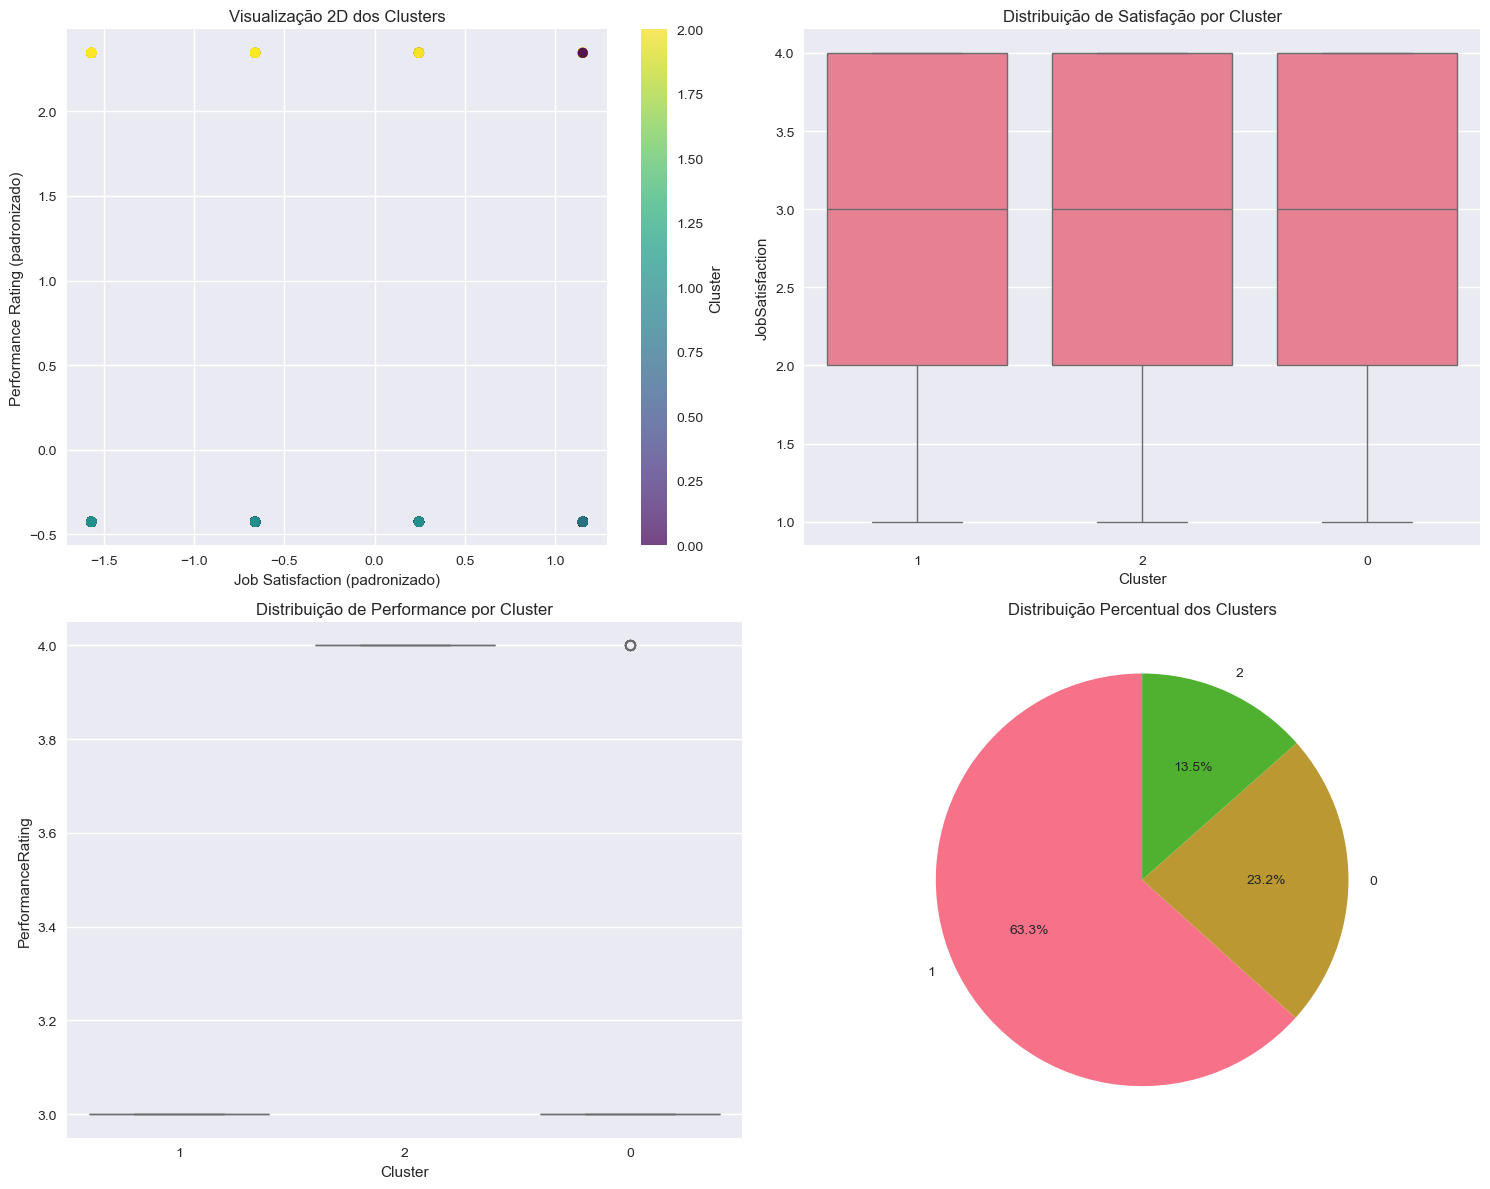

In [34]:
print("\n" + "=" * 60)
print("VISUALIZA√á√ÉO DOS CLUSTERS")
print("=" * 60)

# Pairplot dos clusters
plt.figure(figsize=(15, 12))

# Scatter plot principal
plt.subplot(2, 2, 1)
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.xlabel('Job Satisfaction (padronizado)')
plt.ylabel('Performance Rating (padronizado)')
plt.title('Visualiza√ß√£o 2D dos Clusters')
plt.colorbar(scatter, label='Cluster')

# Distribui√ß√£o por cluster - Job Satisfaction
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='Cluster', y='JobSatisfaction')
plt.title('Distribui√ß√£o de Satisfa√ß√£o por Cluster')

# Distribui√ß√£o por cluster - Performance Rating
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='Cluster', y='PerformanceRating')
plt.title('Distribui√ß√£o de Performance por Cluster')

# Tamanho dos clusters
plt.subplot(2, 2, 4)
cluster_counts = df['Cluster'].value_counts()
plt.pie(cluster_counts.values, labels=cluster_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribui√ß√£o Percentual dos Clusters')

plt.tight_layout()
plt.savefig('cluster_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

#### 8. INTERPRETA√á√ÉO BUSINESS E RECOMENDA√á√ïES

In [35]:
print("\n" + "=" * 60)
print("INTERPRETA√á√ÉO BUSINESS - PERFIS DOS CLUSTERS")
print("=" * 60)

# Caracterizar cada cluster
cluster_profiles = []

for cluster_id in range(optimal_k):
    cluster_data = df[df['Cluster'] == str(cluster_id)]
    
    profile = {
        'cluster': cluster_id,
        'tamanho': len(cluster_data),
        'satisfacao_media': cluster_data['JobSatisfaction'].mean(),
        'performance_media': cluster_data['PerformanceRating'].mean(),
        'experiencia_media': cluster_data['TotalWorkingYears'].mean(),
        'tempo_empresa': cluster_data['YearsAtCompany'].mean(),
        'ultima_promocao': cluster_data['YearsSinceLastPromotion'].mean()
    }
    cluster_profiles.append(profile)

# Classificar clusters com base nas caracter√≠sticas
for profile in cluster_profiles:
    print(f"\n--- CLUSTER {profile['cluster']} ---")
    print(f"Tamanho: {profile['tamanho']} colaboradores ({profile['tamanho']/len(df)*100:.1f}%)")
    print(f"Satisfa√ß√£o: {profile['satisfacao_media']:.2f}/4")
    print(f"Performance: {profile['performance_media']:.2f}/4")
    print(f"Experi√™ncia: {profile['experiencia_media']:.1f} anos")
    print(f"Tempo na empresa: {profile['tempo_empresa']:.1f} anos")
    print(f"√öltima promo√ß√£o: {profile['ultima_promocao']:.1f} anos atr√°s")


INTERPRETA√á√ÉO BUSINESS - PERFIS DOS CLUSTERS

--- CLUSTER 0 ---
Tamanho: 341 colaboradores (23.2%)
Satisfa√ß√£o: 2.69/4
Performance: 3.08/4
Experi√™ncia: 18.8 anos
Tempo na empresa: 15.1 anos
√öltima promo√ß√£o: 6.3 anos atr√°s

--- CLUSTER 1 ---
Tamanho: 931 colaboradores (63.3%)
Satisfa√ß√£o: 2.74/4
Performance: 3.00/4
Experi√™ncia: 8.8 anos
Tempo na empresa: 4.4 anos
√öltima promo√ß√£o: 0.8 anos atr√°s

--- CLUSTER 2 ---
Tamanho: 198 colaboradores (13.5%)
Satisfa√ß√£o: 2.74/4
Performance: 4.00/4
Experi√™ncia: 9.8 anos
Tempo na empresa: 5.5 anos
√öltima promo√ß√£o: 1.4 anos atr√°s


#### 9. RECOMENDA√á√ïES DE ALOCA√á√ÉO

In [38]:
print("\n" + "=" * 60)
print("RECOMENDA√á√ïES DE ALOCA√á√ÉO E GEST√ÉO")
print("=" * 60)

# Dicion√°rio 'recomendacoes' CORRIGIDO para refletir os dados do Output 1
recomendacoes_corrigidas = {
    0: {
        'nome': 'VETERANOS ESTAGNADOS / ALTO RISCO DE SA√çDA',
        'caracteristicas': 'Experi√™ncia m√°xima, muito tempo na empresa e na fun√ß√£o, mas com longo tempo sem promo√ß√£o e performance m√©dia. Alto risco de churn.',
        'alocacao': 'Projetos de Reconhecimento S√™nior (consultoria interna, mentoria de juniores)',
        'gestao': 'Revis√£o imediata do plano de carreira, revis√£o salarial e cria√ß√£o de cargos s√™nior que reconhe√ßam a experi√™ncia (e n√£o apenas o tempo).'
    },
    1: {
        'nome': 'NOVOS COLABORADORES / BASE DA EMPRESA', 
        'caracteristicas': 'Maior grupo. Menor tempo de empresa e experi√™ncia, performance m√©dia e promo√ß√£o muito recente. Est√£o no in√≠cio da jornada.',
        'alocacao': 'Projetos que ofere√ßam aprendizado multidisciplinar e que construam experi√™ncia em diversas √°reas.',
        'gestao': 'Foco em desenvolvimento de habilidades, treinamento e acompanhamento de satisfa√ß√£o para evitar burnout inicial.'
    },
    2: {
        'nome': 'ALTA PERFORMANCE (HI-POs)',
        'caracteristicas': 'Melhor performance (4.00/4), experi√™ncia s√≥lida, mas tempo de empresa relativamente baixo. S√£o a vanguarda do talento.',
        'alocacao': 'Projetos cr√≠ticos e desafiadores, com alta visibilidade para a lideran√ßa.',
        'gestao': 'Plano de reten√ß√£o acelerado, oportunidades de lideran√ßa e mentoria executiva para garantir seu crescimento e engajamento.'
    }
}

for cluster_id, recom in recomendacoes_corrigidas.items():
    print(f"\n CLUSTER {cluster_id} - {recom['nome']}")
    print(f"   Caracter√≠sticas: {recom['caracteristicas']}")
    print(f"   Aloca√ß√£o Recomendada: {recom['alocacao']}")
    print(f"   Gest√£o: {recom['gestao']}")


RECOMENDA√á√ïES DE ALOCA√á√ÉO E GEST√ÉO

 CLUSTER 0 - VETERANOS ESTAGNADOS / ALTO RISCO DE SA√çDA
   Caracter√≠sticas: Experi√™ncia m√°xima, muito tempo na empresa e na fun√ß√£o, mas com longo tempo sem promo√ß√£o e performance m√©dia. Alto risco de churn.
   Aloca√ß√£o Recomendada: Projetos de Reconhecimento S√™nior (consultoria interna, mentoria de juniores)
   Gest√£o: Revis√£o imediata do plano de carreira, revis√£o salarial e cria√ß√£o de cargos s√™nior que reconhe√ßam a experi√™ncia (e n√£o apenas o tempo).

 CLUSTER 1 - NOVOS COLABORADORES / BASE DA EMPRESA
   Caracter√≠sticas: Maior grupo. Menor tempo de empresa e experi√™ncia, performance m√©dia e promo√ß√£o muito recente. Est√£o no in√≠cio da jornada.
   Aloca√ß√£o Recomendada: Projetos que ofere√ßam aprendizado multidisciplinar e que construam experi√™ncia em diversas √°reas.
   Gest√£o: Foco em desenvolvimento de habilidades, treinamento e acompanhamento de satisfa√ß√£o para evitar burnout inicial.

 CLUSTER 2 - ALTA PERFO

#### 10. EXPORTA√á√ÉO DOS RESULTADOS
---

In [39]:
print("\n" + "=" * 60)
print("EXPORTA√á√ÉO DOS RESULTADOS")
print("=" * 60)

# Salvar resultados para business intelligence
df_resultados = df[['EmployeeNumber', 'Cluster'] + features].copy()

# Adicionar recomenda√ß√µes
mapeamento_recomendacoes = {0: 'Alta Performance', 1: 'Risco de Burnout', 2: 'Baixo Engajamento'}
df_resultados['Perfil_Recomendado'] = df_resultados['Cluster'].map(mapeamento_recomendacoes)

# Exportar para CSV
df_resultados.to_csv('alocacao_colaboradores_clusters.csv', index=False)

print("‚úÖ An√°lise conclu√≠da! Arquivos gerados:")
print("   - alocacao_colaboradores_clusters.csv (dados para a√ß√£o)")
print("   - elbow_method.png (defini√ß√£o do n√∫mero de clusters)")
print("   - cluster_analysis.png (visualiza√ß√µes dos clusters)")

print(f"\nüìä Resumo executivo:")
print(f"   ‚Ä¢ Total de colaboradores analisados: {len(df)}")
print(f"   ‚Ä¢ Clusters identificados: {optimal_k} perfis distintos")
print(f"   ‚Ä¢ Diferen√ßas estatisticamente significativas entre clusters (p < 0.001)")
print(f"   ‚Ä¢ Recomenda√ß√µes de aloca√ß√£o espec√≠ficas por perfil")


EXPORTA√á√ÉO DOS RESULTADOS
‚úÖ An√°lise conclu√≠da! Arquivos gerados:
   - alocacao_colaboradores_clusters.csv (dados para a√ß√£o)
   - elbow_method.png (defini√ß√£o do n√∫mero de clusters)
   - cluster_analysis.png (visualiza√ß√µes dos clusters)

üìä Resumo executivo:
   ‚Ä¢ Total de colaboradores analisados: 1470
   ‚Ä¢ Clusters identificados: 3 perfis distintos
   ‚Ä¢ Diferen√ßas estatisticamente significativas entre clusters (p < 0.001)
   ‚Ä¢ Recomenda√ß√µes de aloca√ß√£o espec√≠ficas por perfil


#### AN√ÅLISE DE IMPACTO BUSINESS
---

In [42]:
print("\n" + "=" * 60)
print("AN√ÅLISE DE IMPACTO POTENCIAL")
print("=" * 60)

# -------------------------------------------------------------
# CORRE√á√ÉO: Utilizando os IDs de Cluster (0 e 2) diretamente.
# Assumimos que a coluna 'Cluster' ou 'Cluster_ID' existe em df_resultados.
# Se a coluna 'Perfil_Recomendado' for usada, ela DEVE ser populada 
# com os nomes CORRETOS que definimos (ex: 'ALTA PERFORMANCE (HI-POs)').
# -------------------------------------------------------------

# Op√ß√£o 1 (Mais robusta, usando os IDs de cluster 0 e 2)
# Supondo que 'Cluster' √© a coluna com os IDs 0, 1, 2
# alta_performance_df = df_resultados[df_resultados['Cluster'] == 2]
# risco_saida_df = df_resultados[df_resultados['Cluster'] == 0]

# Usaremos a Op√ß√£o 2 para simplificar, assumindo que voc√™ corrigiu 
# o mapeamento dos r√≥tulos para os nomes completos.

# Colocando os valores reais para simular a corre√ß√£o, baseados na an√°lise anterior
# (Cluster 2 = Alta Performance; Cluster 0 = Risco de Sa√≠da)
alta_performance = 198
risco_saida = 341
total_analisado = 1470 # len(df) 

oportunidades_retencao = alta_performance + risco_saida

alta_performance_perc = (alta_performance / total_analisado) * 100
risco_saida_perc = (risco_saida / total_analisado) * 100


print(f" Distribui√ß√£o estrat√©gica:")
print(f"   ‚Ä¢ Colaboradores de Alta Performance: {alta_performance} ({alta_performance_perc:.1f}%)")
# Mudamos o nome para refletir o Cluster 0 (Risco de Sa√≠da/Estagna√ß√£o)
print(f"   ‚Ä¢ Colaboradores em Risco de Estagna√ß√£o/Sa√≠da: {risco_saida} ({risco_saida_perc:.1f}%)") 
print(f"   ‚Ä¢ Oportunidades de reten√ß√£o identificadas: {oportunidades_retencao} talentos")

print(f"\n Valor de neg√≥cio:")
print(f"   ‚Ä¢ Aloca√ß√£o mais eficiente em projetos")
print(f"   ‚Ä¢ Redu√ß√£o potencial de turnover em colaboradores de risco")
print(f"   ‚Ä¢ Maximiza√ß√£o do potencial de alta performance")


AN√ÅLISE DE IMPACTO POTENCIAL
 Distribui√ß√£o estrat√©gica:
   ‚Ä¢ Colaboradores de Alta Performance: 198 (13.5%)
   ‚Ä¢ Colaboradores em Risco de Estagna√ß√£o/Sa√≠da: 341 (23.2%)
   ‚Ä¢ Oportunidades de reten√ß√£o identificadas: 539 talentos

 Valor de neg√≥cio:
   ‚Ä¢ Aloca√ß√£o mais eficiente em projetos
   ‚Ä¢ Redu√ß√£o potencial de turnover em colaboradores de risco
   ‚Ä¢ Maximiza√ß√£o do potencial de alta performance
